In [1]:
from sympy import init_session
from sympy.plotting import plot
import numpy as np
init_session()
%matplotlib inline

IPython console for SymPy 1.6.2 (Python 3.8.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



# 1.5 Bestemt integral som grense for en sum

Funksjonen gitt ved $$f(x) = \sqrt{x}$$ har grafen som vist under.

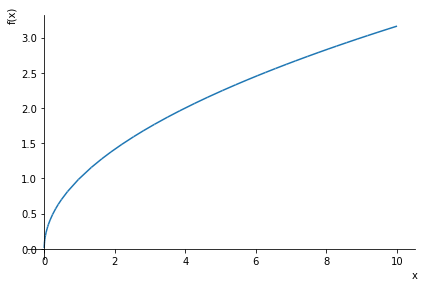

In [2]:
p = plot(x ** 0.5)  # her "plotter" vi funksjonen x^0.5, eller altså kvadratroten av x.

Om vi skraverer et flatestykke avgrenset av $x$-aksen, linja $x=1$, linja $x=6$ og grafen til funksjonen $f$, ser vi et areal av en bestemt størrelse. Vi ønsker å finne dette arealet.

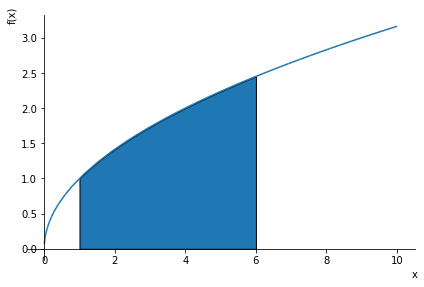

In [3]:
# Denne koden er det ikke meningen at elever skal skrive av.

p = plot(x ** 0.5, fill={'x' : np.linspace(1, 6, 100), 'y1' : np.linspace(1, 6, 100)**0.5, 'edgecolor':'#000000'})

## Tilnærming med rektangler

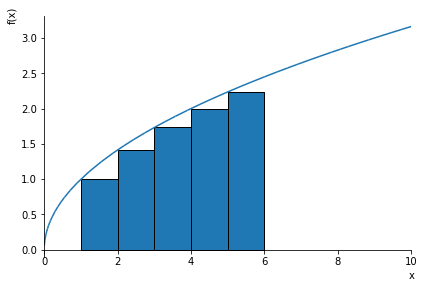

In [4]:
# Denne koden er det ikke meninga et elever skal skrive av.

p = plot(x ** 0.5, rectangles=[{'xy':(xval,0), 'width':1, 'height':xval**0.5, 'edgecolor':'#000000'} for xval in np.arange(1,6,1)], xlim=[0, 10])

Her har vi seks rektangler, hver med bredde $\Delta x = 1$. Høyden av rektanglene blir $f(1)$, $f(2)$, $f(3)$, $f(4)$, og $f(5)$. Rektangelet med høyde $f(1)$ har da areal $\Delta x \cdot f(1)$ osv. Vi kan finne alle rektanglene som vist under.

In [5]:
summen = 0
def f(x):
    return x ** 0.5

xverdier = [1, 2, 3, 4, 5,]
delta_x = 1

for xverdi in xverdier:
    summen += delta_x * f(x)
    
display(summen)

Ifølge utregningene våre er altså det totale arealet 8.38.

**Hvordan samsvarer dette med det fullstendige skraverte arealet over?**

### Oppgave 1.50
En funksjon $f$ er gitt ved $$f(x) = x^2, \quad x\in[0, 6].$$

a) _Gjøres for hånd._

b) Finn ved hjelp av Geogebra (!) en tilnærmingsverdi for arealet $A$ ved hjelp av 100 rektangler.

_Geogebra_

![Utklipp fra geogebra.org](figurer/r2-1.50b-geogebra.png)

Vi ser altså at Geogebra gir svaret 70,92. (Legg også merke til at funksjonen har endret navn.)

_Python_

In [6]:
n = 100  # antall rektangler
delta_x = (6 - 0) / n  # bredden til hvert rektangel
sum(x**2 * delta_x for x in np.arange(0, 6, delta_x))

### Eksempel s. 29
La funksjonen $f$ være gitt ved $$f(x) = x^2 - 4x + 3.$$

a) Tegn grafen til $f$.

b) Finn arealet av det flatestykket $F$ som er avgrenset av $x$-aksen og grafen uten bruk av CAS

c) Finn det eksakte arealet $F$ ved hjelp av CAS.

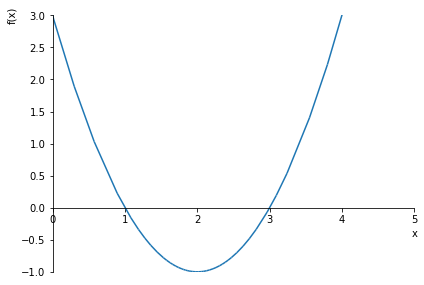

In [7]:
f = x ** 2 - 4*x + 3
p = plot(f, xlim=(0, 5), ylim=(-1, 3))


In [8]:
solve(f)  # Dette løser likningen 'f(x) = 0'


Vi har altså tegnet grafen til $f(x)$, og funnet ut at den har nullpunkt i $x=1$ og $x=3$. For å finne arealet til grafen mellom $x = 1$ og $x = 3$ kan vi da bruke funksjonen `integrate`.

In [10]:
integrate(f, (x, 1, 3))  # her sier vi "integrer f, med hensyn til x fra 1 til 3."